# Iris Dataset Classification using Support Vector Machine, Random Forest, and Gradient Boosting Classifier

## Iris Dataset
Iris Data set contains information about 3 different species of Iris plant, with 50 instances for each of the species. It is a multivariate dataset normally used for the classification tasks using input numeric features and multiclass output.

This dataset is readily available at UCI Machine learning repository, and contains 4 input attributes for each instance. We will use these continuous attributes to develop a classification model for 3 species of Iris plant.

## Data Reading and Exploratory Analysis

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Data set of Iris flowers
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Null value check
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [8]:
#  now check if all the features have been assigned proper data-types
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

### Seems like, we are good to perform exploratory data analysis of the Iris data. So, here we go with the pair plot:

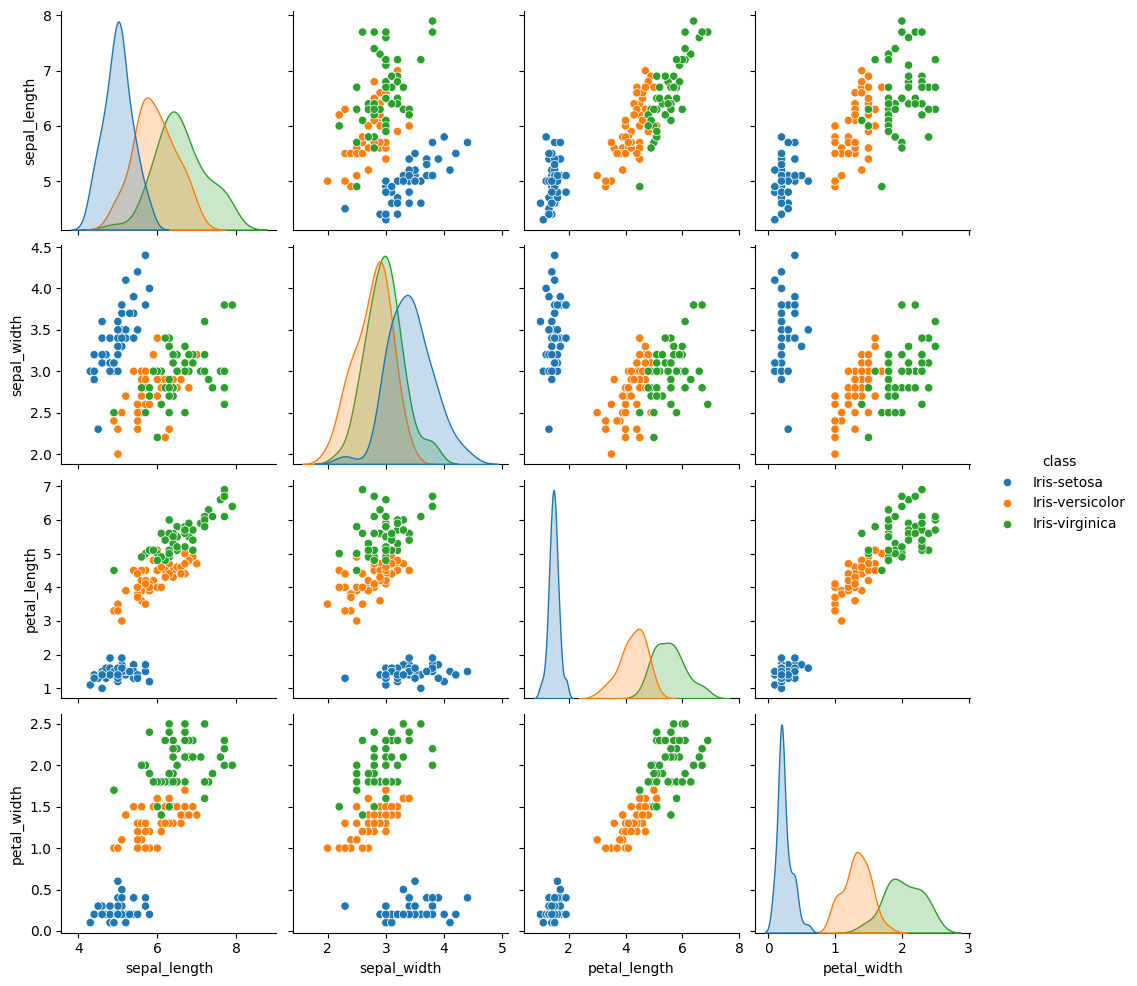

In [9]:
# Pair plot to visualize relationships
sns.pairplot(df, hue='class')

## Pair plot shows the relationship between all the numeric features with the ‘Kernel Density (kde) Plot’ for each individual feature on the diagonal.

## let’s convert the class variable into ‘numeric’ values from ‘object’ entity using label-encoder. Label encoder converts the ‘object’ discrete values into ‘numeric’ ones which can be interpreted by the mathematical machine learning algorithms:

In [10]:
class_labels = df['class'].unique()
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
class_labels_encoded = encoder.transform(class_labels)

## Now find the correlation between each input feature and the output feature:



In [11]:
# Correlation between features input and output
df.corr()['class']

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
class           1.000000
Name: class, dtype: float64

### As already predicted using exploratory data analysis, Petal Width and Petal Length highly impact the outcome of a class.

In [18]:
%matplotlib inline

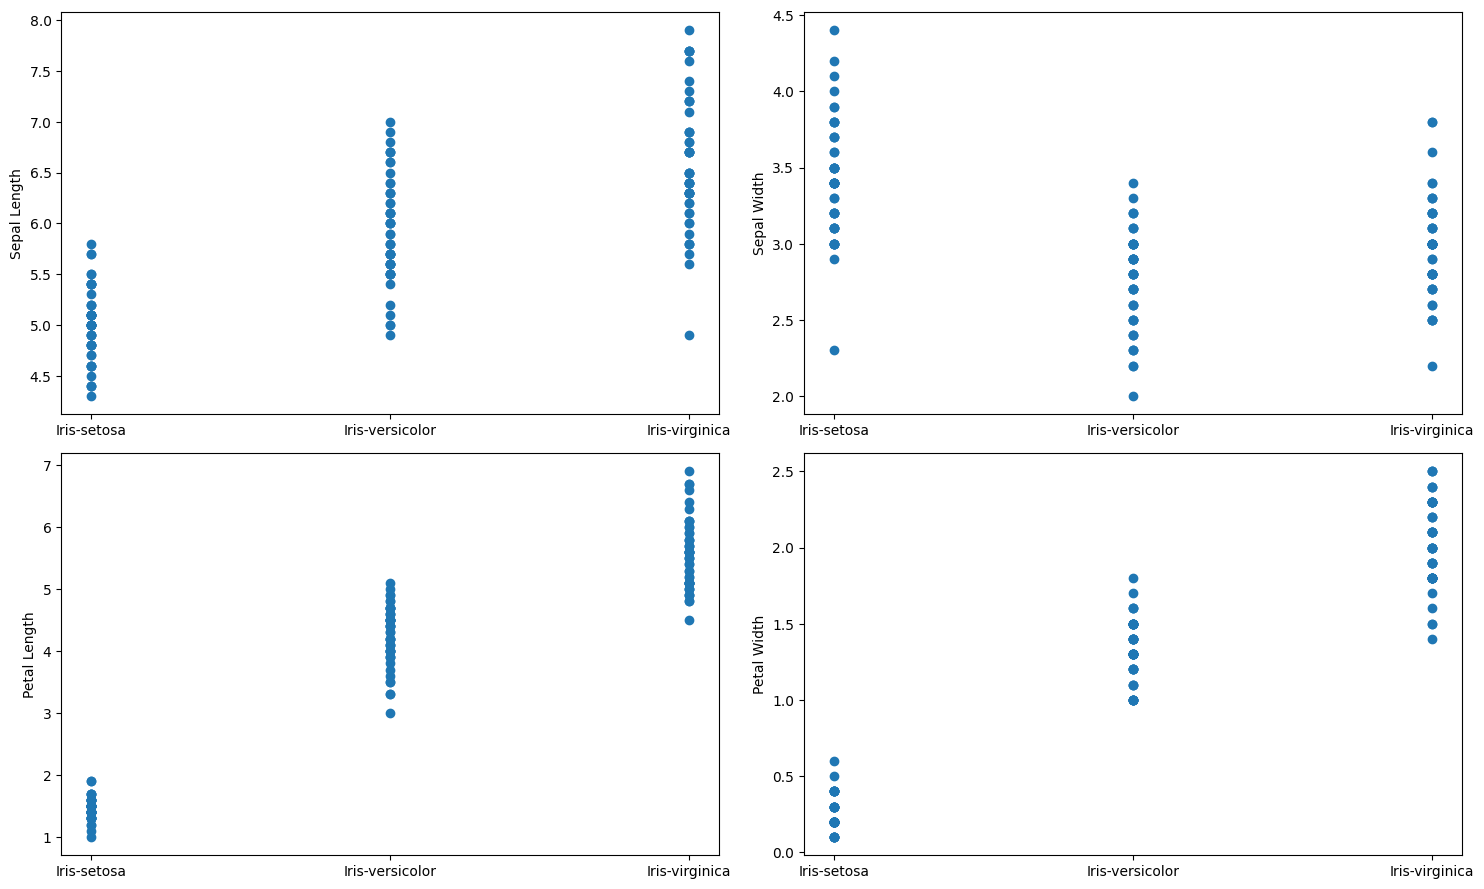

In [20]:
# Let’s now observe the relationship between each input ‘numeric’ feature and the encoded output feature:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,9))
 
ax1.scatter(x = df['class'], y = df['sepal_length'])
ax1.set_ylabel("Sepal Length")
ax1.set_xticks(class_labels_encoded)
ax1.set_xticklabels(class_labels)
 
ax2.scatter(x = df['class'], y = df['sepal_width'])
ax2.set_ylabel("Sepal Width")
ax2.set_xticks(class_labels_encoded)
ax2.set_xticklabels(class_labels)
 
ax3.scatter(x = df['class'], y = df['petal_length'])
ax3.set_ylabel("Petal Length")
ax3.set_xticks(class_labels_encoded)
ax3.set_xticklabels(class_labels)
 
ax4.scatter(x = df['class'], y = df['petal_width'])
ax4.set_ylabel("Petal Width")
ax4.set_xticks(class_labels_encoded)
ax4.set_xticklabels(class_labels)

plt.tight_layout()
plt.show()

# Data Pre-processing

In [21]:
# irstly, separate the Input features of the data from its output class
X = df.drop('class', axis=1)
y = df['class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Since the input features are numeric and differ in individual scales, they need to be scaled such that the distribution of each feature will have mean=0, and std=1.

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## After the necessary pre-processing, let’s build our first multi-class training model using Support Vector Machine (SVM) and evaluate its performance…

# Data Classification using Support Vector Machines

In [25]:
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
svm_y_pred = svm_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Hyperparameter tuning for SVM
In the previous approach, we used default parameters of the SVC() model which might not be the best parameters to train the model.

We can take an alternative approach to train the model using a subset of hyperparameters, and then select best parameters based on a metric:

In [28]:
svm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'kernel': ['linear', 'rbf','poly'],
                  'gamma' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring='accuracy')
svm_grid.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.001, 0.01, ...], 'gamma': [0.0001, 0.001, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,KFold(n_split...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


## SVC() model will be trained using each combination of the hyperparameters specified in ‘svm_param_grid’.

## Hyperparameters resulting in the maximum accuracy will be used to train the model on the complete dataset in the final stages of ‘GridSearchCV’.

We can get the parameters which resulted in the maximum accuracy as follows:

In [29]:
print('SVM best Params:', svm_grid.best_params_)
print('SVM best Score:', svm_grid.best_score_)

SVM best Params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVM best Score: 0.9666666666666668


## Let’s evaluate the performance of the optimized model on the test dataset:

In [30]:
svm_y_pred = svm_grid.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Data Classification using Random Forest Classifier

In [31]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# Let’s observe the accuracy of the Random Forest model on the test data set:
rf_y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Hyperparameter tuning for Random Forest
Similar to what we did for the SVM model, we will tune the hyperparameters of the Random Forest Classifier using 5-fold cross-validation via GridSearchCV():

In [34]:
rf_param_grid = {'max_samples': [0.1, 0.2, 0.3, 0.4],
                'max_features': [1, 2],
                'n_estimators':[10, 50, 100],
                'max_depth': [8, 9, 10]
                }
rf_cv = KFold(n_splits=5)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=rf_cv)
rf_grid.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [8, 9, ...], 'max_features': [1, 2], 'max_samples': [0.1, 0.2, ...], 'n_estimators': [10, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


# After the model is trained, you can get the best model parameters as well as evaluate the performance of the trained model on the test data set:

In [35]:
print('RF best Parameters:', rf_grid.best_estimator_)
print('RF best Score:', rf_grid.best_score_)

RF best Parameters: RandomForestClassifier(max_depth=9, max_features=2, max_samples=0.2,
                       n_estimators=10)
RF best Score: 0.975


In [36]:
rf_y_pred = rf_grid.predict(X_test)
print('Accuray:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuray: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Data Classification using Gradient Boosting Classifier
Gradient Boosting classifier is a combined sequential model of various Decision Trees, where the outcome of one decision tree is used to train the next one and so on.

‘learning_rate’ will specify how much impact outcome of one tree has on the next one. You can control underfitting/overfitting of the gradient boosting classifier using ‘learning_rate’ of the model.

In [37]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


‘n_estimators’ specify the number of decision trees to be employed in training the gradient boosting classifier.

In [38]:
gb_y_pred = gb_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Hyperparameter tuning for Gradient Boosting Classifier
Tuning the hyperparameters for this classifier is more or less similar to that of Random Forest Classifier:

In [39]:
gb_grid_param = {'learning_rate': [0.01, 0.05, 0.1, 1],
                 'n_estimators' : [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 8, 11],
                 'max_features': [1,2]}
gb_cv = KFold(n_splits=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_grid_param, cv=gb_cv)
gb_grid.fit(X_train, y_train)

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [2, 5, ...], 'max_features': [1, 2], 'n_estimators': [10, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


Best parameters and performance of the gradient boosting classifier on the testing set can be evaluated as follows:

In [40]:
print('GB best Parameters:', gb_grid.best_estimator_)
print('GB best Score:', gb_grid.best_score_)

GB best Parameters: GradientBoostingClassifier(learning_rate=1, max_depth=11, max_features=1)
GB best Score: 0.9583333333333333


In [41]:
gb_y_pred = gb_grid.predict(X_test)
print('Accuray:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuray: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Conclusion
In this tutorial, we developed Support Vector Machine, Random Forest and Gradient Boost classification models for multi-class iris data set. These classification models helped us identify the three species of iris plant using four input features. The hyperparameters of all the models were also tuned to optimize the performance of the classification model for all the algorithms.

Models were trained on the training data (80%), and their performance was evaluated using testing data (20%). Approx. accuracy of 97% showed that all of the trained models were able to classify the iris plant species correctly.